In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv('insurance_pre.csv')

In [3]:
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [4]:
dataset=pd.get_dummies(dataset,dtype=int,drop_first=True)

In [5]:
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


In [6]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [7]:
independent=dataset[['age', 'bmi', 'children','sex_male', 'smoker_yes' ]]

In [8]:
independent

,age,bmi,children,sex_male,smoker_yes
0,19,27.900,0,0,1
1,18,33.770,1,1,0
2,28,33.000,3,1,0
3,33,22.705,0,1,0
4,32,28.880,0,1,0
...,...,...,...,...,...
1333,50,30.970,3,1,0
1334,18,31.920,0,0,0
1335,18,36.850,0,0,0
1336,21,25.800,0,0,0


In [9]:
dependent=dataset[['charges']]

In [10]:
dependent

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [11]:
from sklearn.model_selection  import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
param_grid={'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],'splitter':['best','random'],'max_features':['sqrt','log2',None]}

grid=GridSearchCV(DecisionTreeRegressor(),param_grid,refit=True,verbose=3,n_jobs=-1)
grid.fit(independent,dependent)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_features': ['sqrt', 'log2', None],
                         'splitter': ['best', 'random']},
             verbose=3)

In [12]:
re=grid.cv_results_

print("The R_score value for best parameters {}: ".format(grid.best_params_))

The R_score value for best parameters {'criterion': 'absolute_error', 'max_features': None, 'splitter': 'random'}: 


In [13]:
table=pd.DataFrame.from_dict(re)

In [14]:
table

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009724,0.004022,0.009401,0.006686,squared_error,sqrt,best,"{'criterion': 'squared_error', 'max_features':...",0.687111,0.533273,0.727601,0.718173,0.740827,0.681397,0.076148,9
1,0.007999,0.002318,0.003881,0.003535,squared_error,sqrt,random,"{'criterion': 'squared_error', 'max_features':...",0.622809,0.562928,0.568505,0.634795,0.716163,0.621040,0.055457,22
2,0.011609,0.002756,0.004964,0.002062,squared_error,log2,best,"{'criterion': 'squared_error', 'max_features':...",0.689075,0.529047,0.713883,0.695711,0.676060,0.660755,0.066974,16
3,0.006484,0.003082,0.004354,0.004514,squared_error,log2,random,"{'criterion': 'squared_error', 'max_features':...",0.386429,0.594385,0.696699,0.720926,0.664905,0.612669,0.120854,24
4,0.014253,0.002415,0.006662,0.004553,squared_error,None,best,"{'criterion': 'squared_error', 'max_features':...",0.725693,0.624145,0.733697,0.731483,0.668327,0.696669,0.043562,6
5,0.012787,0.004811,0.005915,0.003128,squared_error,None,random,"{'criterion': 'squared_error', 'max_features':...",0.702294,0.655389,0.716490,0.734604,0.733385,0.708432,0.029065,4
6,0.010788,0.002032,0.005265,0.002695,friedman_mse,sqrt,best,"{'criterion': 'friedman_mse', 'max_features': ...",0.530952,0.589765,0.738656,0.699521,0.512102,0.614199,0.090244,23
7,0.008623,0.003847,0.005345,0.003381,friedman_mse,sqrt,random,"{'criterion': 'friedman_mse', 'max_features': ...",0.703769,0.573872,0.615186,0.702600,0.692710,0.657628,0.053289,18
8,0.007726,0.002160,0.004356,0.003916,friedman_mse,log2,best,"{'criterion': 'friedman_mse', 'max_features': ...",0.747856,0.629228,0.652734,0.625503,0.719792,0.675022,0.049709,12
9,0.009317,0.001372,0.003169,0.004270,friedman_mse,log2,random,"{'criterion': 'friedman_mse', 'max_features': ...",0.655246,0.538303,0.658382,0.596161,0.693516,0.628321,0.054802,21


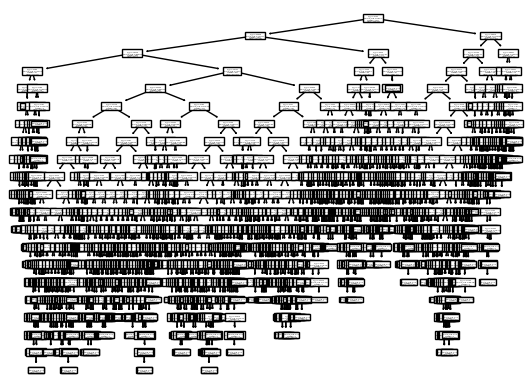

In [15]:
import matplotlib.pyplot as plt
from sklearn import tree
best_tree = grid.best_estimator_
tree.plot_tree(best_tree)
plt.show( )

In [16]:
y_pred=grid.predict(independent)

In [17]:
from sklearn.metrics import r2_score
r_score=r2_score(dependent,y_pred)

In [18]:
r_score

0.9934080483426752

In [19]:
import pickle
filename="finalized_model_DecisionTree_grid.sav"
pickle.dump(grid,open(filename,'wb'))

In [20]:
loaded_model=pickle.load(open('finalized_model_DecisionTree_grid.sav','rb'))
result=loaded_model.predict([[25,26.5,0,1,0]])

C:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [21]:
result

array([2721.3208])